In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Overall

In [45]:
df = pd.read_csv("data/movie_statistic_dataset.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+ KB


We have 7 numerical features and 7 categorical:

??? - oznaczenie na zmienne, które apriori wydają się być bezuzyteczne, 
im więcej ? tym bardziej bez sensu, ?- sama moze nie miec znaczenia lae w polaczeniu z czyms inym moze sie przydac, ???-budzi watlpiwosci, ?????- prawie na pewno do usuniecia

(do przetłumaczenia)
* ????? movie_title: jakościowa nominalna -> (raczej) unikalna dla filmu, nie będzie brana pod uwagę
* production_date: w obecnej formie raczej jakosciowa uporządkowana ale idk -> mozna wyłuskać rok, porę roku (np. klaster: filmy swiateczne w zime). Być moze bedzie to bardzeij wartosciowe niz surowa data
* genres: jakościowa nominalna -> zamieniłbym na kolumny typu is_action, is_adventure itd 
* runtime_minutes: ilosciowa ilorazowa -> moze jakis skaler idk
* ??? director_name: jakościowa nominalna -> trzeba sprawdzic ilu jest rezyserów (nie mogę napisać z z kropką w vs code xd)
* ??? director_professions: to samo co genres,
* ? director_birthYear: ilosciowa przedziałowa
* ? director_deathYear: do zamiany na is_alive lub połączyć jakoś z dorector_birthYear i przerobić na epokę zycia twórczego typu (nowoczesność, przełom wieków, PRL, powojnie, wojna, międzywojnie, itd...) lub w połączeniu z production_date na epokę zycia rezysera (np. nakrecil to w czasie studiow, po 30, po 40, był u schyłku kariery)
* movie_averageRating: ilościowa ilorazowa?
* movie_numerOfVotes: ilościowa ilorazowa
* approval_Index: idk co to jest
* Production budget $: ilościowa ilorazowa
* Domestic gross $: ilościowa ilorazowa
* Worldwide gross $: ilościowa ilorazowa

In [47]:
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


>There are no NAs but there are some missing values that are coded with "-". We will take a closer look at them in further steps.

In [48]:
df.loc[df.duplicated(),:]

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $


> There are no duplicates.

# Directors data

In [49]:
def get_summary_of_na(df):
    print(f'{"Column":<20s}|', f'{"Num of -":<20s}|', f'{"Num of \\N":<20s}|',f'{"N of both":<20s}|', "Num of unique values")
    print('-'*108)
    for col in df.select_dtypes(include= "object").columns.values:
        sum1 = (df[col] == "\\N").sum()
        sum2 = (df[col] == "-").sum()
        print(f'{col:<20s}|', f'{sum2:<20d}|', f'{sum1:<20d}|',f'{sum1+sum2:<20d}|',f'{df[col].nunique():<20d}')  

In [50]:
get_summary_of_na(df)

Column              | Num of -            | Num of \N           | N of both           | Num of unique values
------------------------------------------------------------------------------------------------------------
movie_title         | 0                   | 0                   | 0                   | 4241                
production_date     | 0                   | 0                   | 0                   | 2458                
genres              | 0                   | 2                   | 2                   | 354                 
director_name       | 326                 | 0                   | 326                 | 1835                
director_professions| 333                 | 0                   | 333                 | 317                 
director_birthYear  | 326                 | 562                 | 888                 | 103                 
director_deathYear  | 326                 | 0                   | 326                 | 63                  


there are 326 movies without known directors and data connected with them and also 7 additional movies without known directors' professions

In [51]:
df.loc[(df["director_professions"] == "-") & (df["director_name"] != "-"), ["movie_title", "director_name"]]

,movie_title,director_name
1061,Race to Witch Mountain,Andy Fickman
1466,Paul Blart: Mall Cop 2,Andy Fickman
2025,Parental Guidance,Andy Fickman
2216,The Game Plan,Andy Fickman
2377,You Again,Andy Fickman
3596,"Juliet, Naked",Jesse Peretz
3674,Our Idiot Brother,Jesse Peretz


In [52]:
df.loc[df["director_name"].isin(["Andy Fickman", "Jesse Peretz"])]

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
1061,Race to Witch Mountain,2009-03-13,"Action,Adventure,Family",98.0,Andy Fickman,-,\N,alive,5.7,60790.0,4.487696,50000000,67172595,105103784
1466,Paul Blart: Mall Cop 2,2015-04-10,"Action,Comedy,Crime",94.0,Andy Fickman,-,\N,alive,4.4,38564.0,3.286789,38000000,71091594,107453907
2025,Parental Guidance,2012-12-25,"Comedy,Family",105.0,Andy Fickman,-,\N,alive,6.0,26184.0,4.359005,25000000,77267296,120832383
2216,The Game Plan,2007-09-28,"Comedy,Family,Sport",110.0,Andy Fickman,-,\N,alive,6.2,76413.0,4.997255,22000000,90648202,146590987
2377,You Again,2010-09-24,"Comedy,Romance",105.0,Andy Fickman,-,\N,alive,5.7,52749.0,4.428195,20000000,25702053,32838945
3596,"Juliet, Naked",2018-08-17,"Comedy,Drama,Music",97.0,Jesse Peretz,-,1968,alive,6.6,23288.0,4.751172,6000000,3444895,5767158
3674,Our Idiot Brother,2011-08-26,"Comedy,Drama",90.0,Jesse Peretz,-,1968,alive,6.4,88870.0,5.233823,5000000,24814830,25861249


Fortunately, these are the only movies of those directors

In [53]:
movies_without_directors = df.loc[df["director_name"] == "-", ["movie_title"]]

Maybe, we can find some data on IMDB if we need to 🤷🏽‍♂️

### Directors' birth and death year data

director_birthYear imputation, source: https://pl.wikipedia.org/wiki/Andy_Fickman

In [54]:
df.loc[df["director_name"] == "Andy Fickman","director_birthYear"] = 1970

director_professions imputation, source: IMDb

In [55]:
df.loc[df["director_name"] == "Andy Fickman","director_professions"] = "director,producer,actor"
df.loc[df["director_name"] == "Jesse Peretz","director_professions"] = "director,producer,writer"

For now, we will omit movies with unknown directors

In [56]:
df = df.loc[df["director_name"] != "-", :]

In [57]:
get_summary_of_na(df)

Column              | Num of -            | Num of \N           | N of both           | Num of unique values
------------------------------------------------------------------------------------------------------------
movie_title         | 0                   | 0                   | 0                   | 3947                
production_date     | 0                   | 0                   | 0                   | 2339                
genres              | 0                   | 1                   | 1                   | 341                 
director_name       | 0                   | 0                   | 0                   | 1834                
director_professions| 0                   | 0                   | 0                   | 316                 
director_birthYear  | 0                   | 557                 | 557                 | 103                 
director_deathYear  | 0                   | 0                   | 0                   | 62                  


In [58]:
df.loc[df["director_birthYear"] == "\\N","director_name"].unique().tolist()

['Josh Cooley',
 'David Leitch',
 'Robert Stromberg',
 'Neil Boultby',
 'Carl Rinsch',
 'Steven S. DeKnight',
 "Tadhg O'Sullivan",
 'Dave Green',
 'Tim Johnson',
 'Mark Steven Johnson',
 'Rob Letterman',
 'Dana Kjeldsen',
 'Dylan Brown',
 'Patrick Hughes',
 'Ericson Core',
 'Lawrence Guterman',
 'Christian Rivers',
 'Kiran Nakti',
 'Sophon Sakdaphisit',
 'Michael Gracey',
 'Dean Parisot',
 'Seth Gordon',
 'Les Mayfield',
 'Antony Hoffman',
 'Chris Renaud',
 'John Bruno',
 'Steve Carr',
 'Pierre Perifel',
 'Mark J. Doddy',
 'Gary McKendry',
 'Mikael Salomon',
 'Kinka Usher',
 'Doug Lefler',
 'Will Gluck',
 'Joel Crawford',
 'Dan Bradley',
 'David Bowers',
 'Stuart Beattie',
 'Marco Schnabel',
 'Demian Lichtenstein',
 'Jay Russell',
 'David McNally',
 'Kevin Donovan',
 'Robert Lorenz',
 'Scott Stewart',
 'John Stevenson',
 'Anthony Hemingway',
 'Kevin Bray',
 'Paul King',
 'Jimmy Hayward',
 'Simon McQuoid',
 'Dominic Deacon',
 'Kent Alterman',
 'Jim Gillespie',
 'Paul Hunter',
 'George N

Here is the imputation plan:
* We will extarct only the movies with all known statistics about directors and production_date
* We will create new feaature: director_age, age of the director when the movie was produced
* ... 

In [59]:
df = df.loc[df["director_birthYear"] != "\\N",:]
get_summary_of_na(df)

Column              | Num of -            | Num of \N           | N of both           | Num of unique values
------------------------------------------------------------------------------------------------------------
movie_title         | 0                   | 0                   | 0                   | 3433                
production_date     | 0                   | 0                   | 0                   | 2173                
genres              | 0                   | 0                   | 0                   | 326                 
director_name       | 0                   | 0                   | 0                   | 1408                
director_professions| 0                   | 0                   | 0                   | 253                 
director_birthYear  | 0                   | 0                   | 0                   | 102                 
director_deathYear  | 0                   | 0                   | 0                   | 62                  


### Production date

In [60]:
df["production_date"] = pd.to_datetime(df["production_date"])
df["production_year"], df["production_month"] = df["production_date"].dt.year, df["production_date"].dt.month

df["director_birthYear"] = pd.to_numeric(df["director_birthYear"])

df["director_age"] = df["production_year"] - df["director_birthYear"]

df["director_years_since_death"] = df["director_deathYear"].apply(lambda x: 0 if x == "alive" else x).astype(dtype=np.int64)

In [61]:
df.loc[df["director_years_since_death"] != 0,"director_years_since_death"] = 2024 - df.loc[df["director_years_since_death"] != 0,"director_years_since_death"]
print("alive directors:", df.loc[df["director_years_since_death"] == 0,"director_name"].unique().shape[0], "all directors:", df.director_name.unique().shape[0])

alive directors: 1223 all directors: 1408


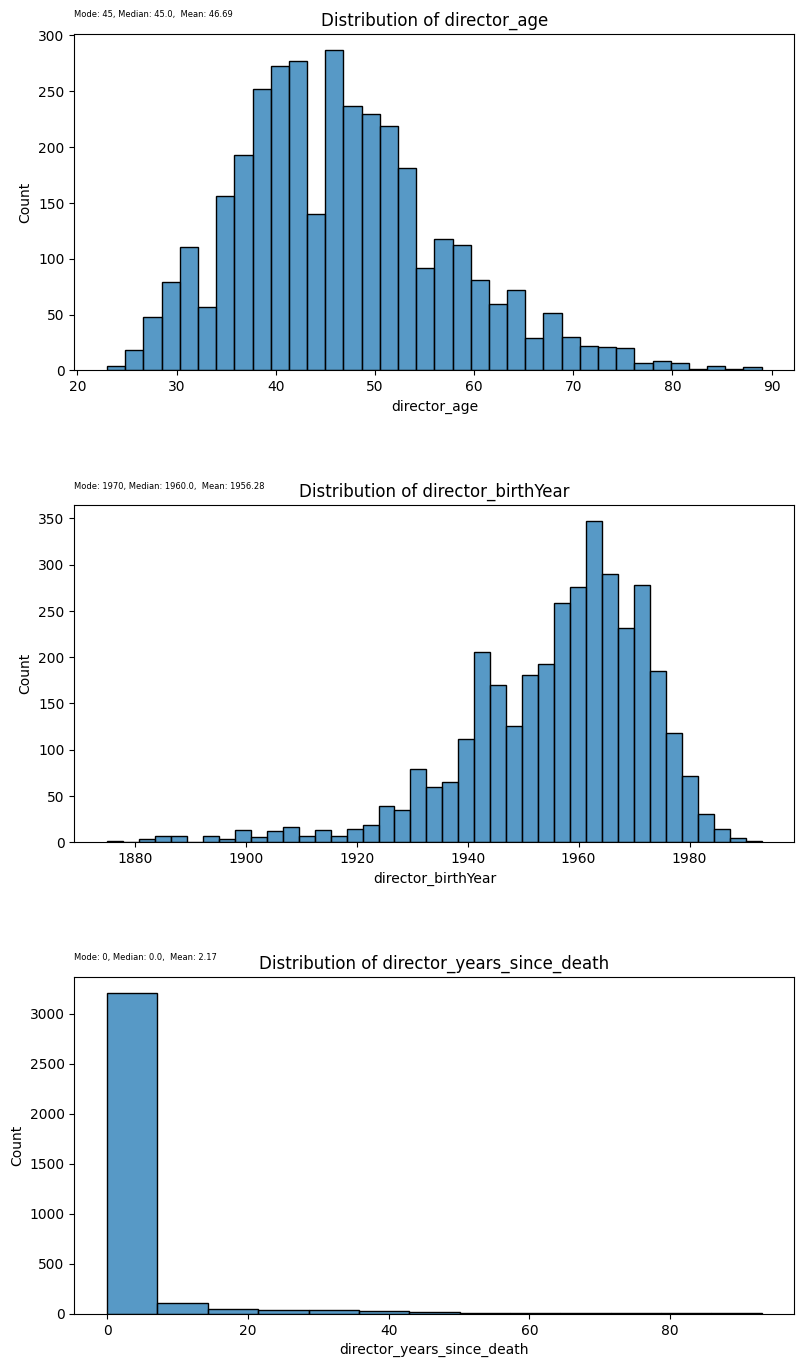

In [62]:
cols = ["director_age", "director_birthYear", "director_years_since_death"]
fig, axs = plt.subplots(len(cols),1,figsize = (9,16))
axs = axs.flatten()
for i,col in enumerate(cols):
    s = df[col]
    sns.histplot(data=df, x=col, ax=axs[i])
    axs[i].title.set_text( f'Distribution of {col}')
    axs[i].text(0.0,1.05,'Mode: {0}, Median: {1},  Mean: {2:.2f}'.format(*[s.mode()[0], s.median(), s.mean()]), fontsize = 6, transform=axs[i].transAxes)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### Director professions

In [63]:
director_professions = df["director_professions"]
professions_splitted = director_professions.str.split(',', expand=True)
professions_splitted_to_one_column = pd.DataFrame(professions_splitted.to_numpy().reshape((-1, 1)), columns=["profession"])

In [64]:
professions_splitted_to_one_column.iloc[:,0].unique()

array(['writer', 'producer', 'director', 'miscellaneous', 'actor',
       'music_department', 'production_designer', 'visual_effects',
       'editorial_department', 'editor', None, 'animation_department',
       'art_department', 'assistant_director', 'cinematographer',
       'sound_department', 'soundtrack', 'camera_department', 'executive',
       'script_department', 'special_effects', 'make_up_department',
       'actress', 'stunts', 'composer', 'music_artist',
       'production_manager', 'art_director', 'costume_designer',
       'location_management', 'casting_director', 'casting_department',
       'transportation_department'], dtype=object)

In [65]:
professions_splitted_to_one_column['profession'].value_counts()

profession
director                     3123
producer                     2788
writer                       2440
actor                         970
miscellaneous                 267
assistant_director            115
soundtrack                    110
cinematographer               109
editor                        107
actress                        68
animation_department           54
camera_department              50
visual_effects                 34
production_designer            32
music_department               31
art_department                 30
editorial_department           27
composer                       20
script_department              16
stunts                         14
sound_department                7
art_director                    6
make_up_department              5
executive                       5
special_effects                 4
music_artist                    4
production_manager              4
costume_designer                2
location_management             1
cas

<Axes: xlabel='profession'>

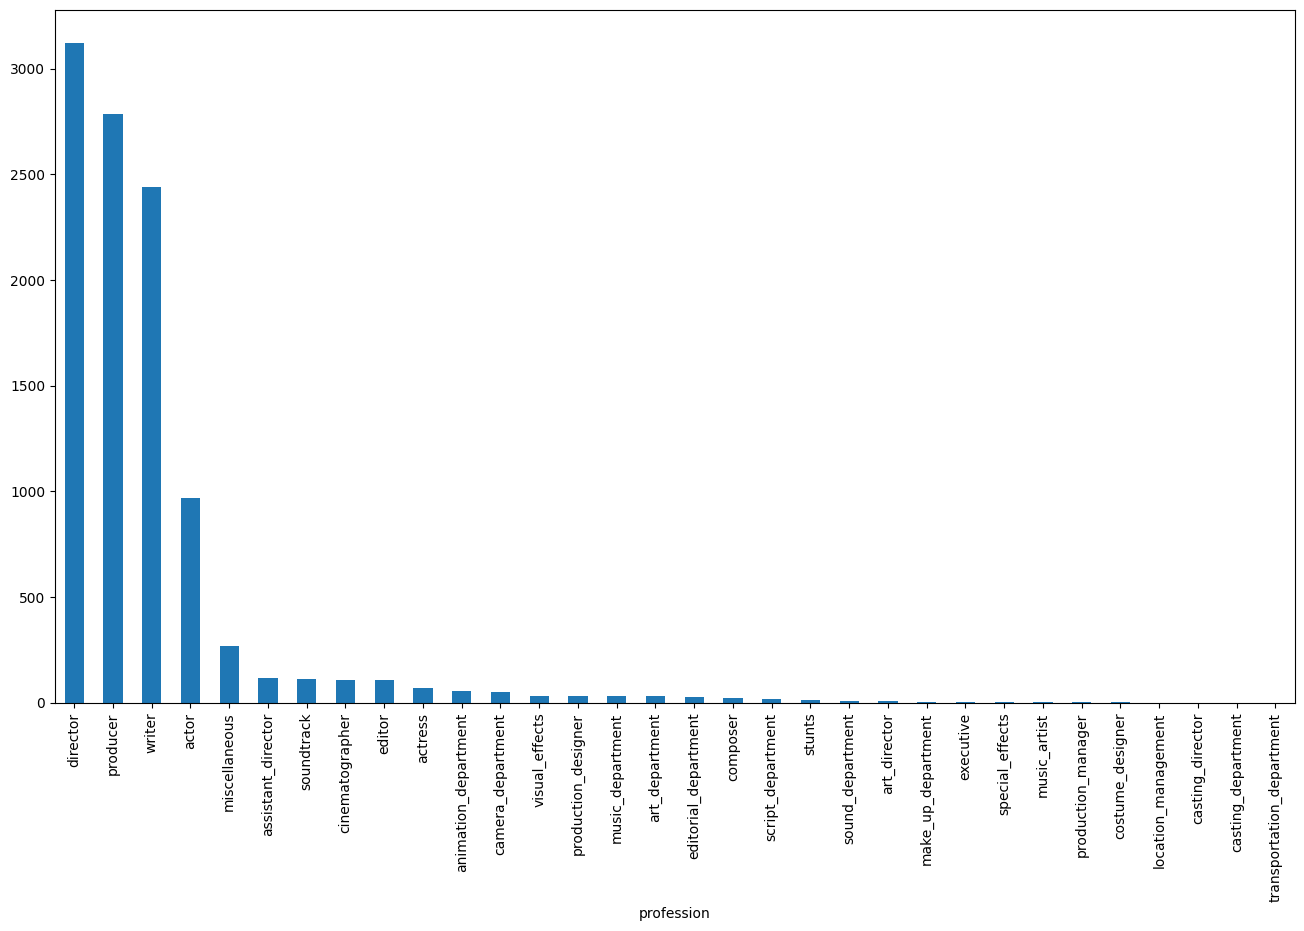

In [66]:
professions_splitted_to_one_column['profession'].value_counts().plot(kind = "bar", figsize= (16,9))

### We have to reduce the number of categories of this feature.

<Axes: xlabel='profession'>

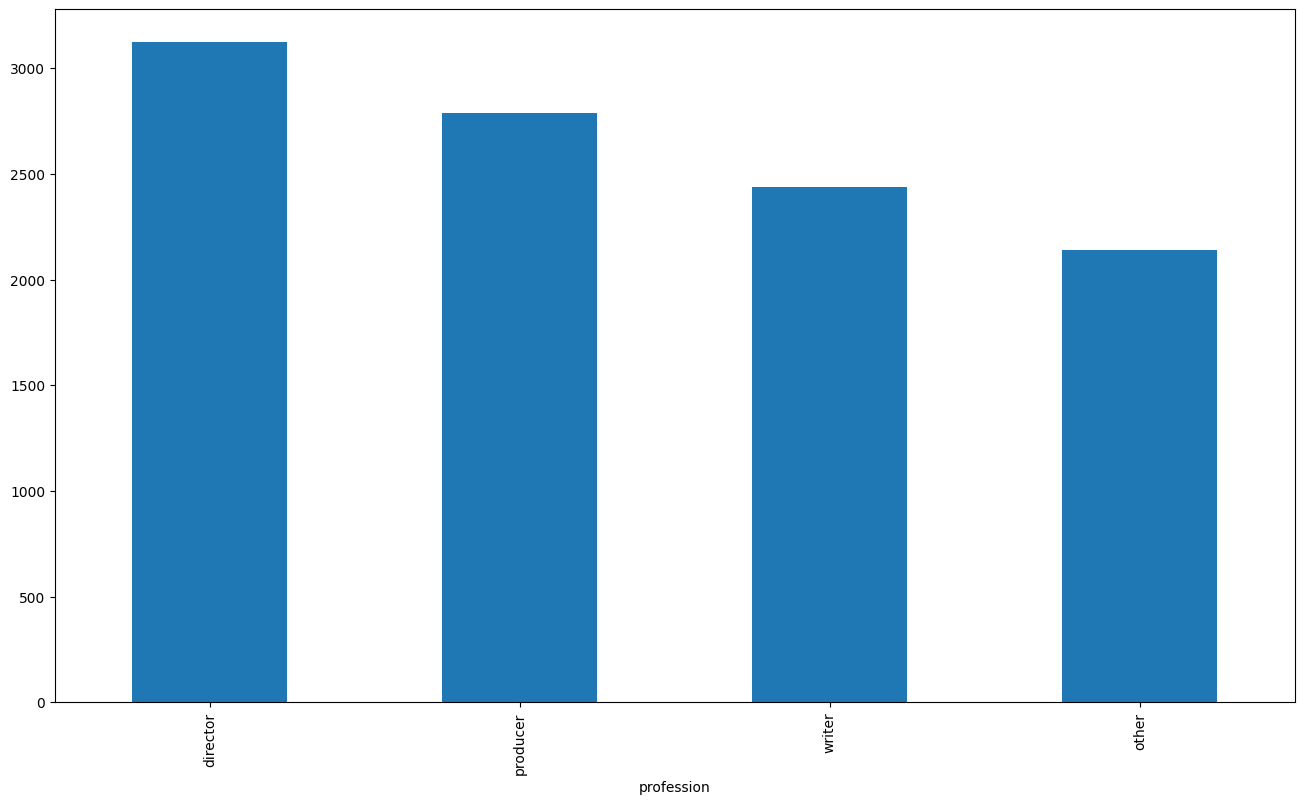

In [67]:
professions_dict = {"director":"director", 
                    "producer":"producer", 
                    "writer":"writer"} #TODO rethink thow to group categories 

professions_splitted_to_one_column['profession'] = professions_splitted_to_one_column['profession'].map(professions_dict).fillna("other")
professions_splitted_to_one_column['profession'].value_counts().plot(kind = "bar", figsize= (16,9))

# Genres data

In previous point, we have found that there are only 354 unique combinations of genres.

In [68]:
genres = df["genres"]
genres_splitted = genres.str.split(',',expand=True)
genres_splitted_to_one_column = pd.DataFrame(genres_splitted.to_numpy().reshape((-1,1)), columns=["genre"])

Let's see what are  possible genres

In [69]:
genres_splitted_to_one_column.iloc[:,0].unique()

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Animation', 'Drama', 'Comedy', 'Family', None, 'Crime', 'Mystery',
       'Western', 'Romance', 'Musical', 'Horror', 'History', 'Biography',
       'War', 'Sport', 'Music', 'Documentary', 'Film-Noir', 'News'],
      dtype=object)

In [70]:
genres_splitted_to_one_column["genre"].value_counts()

genre
Drama          1884
Comedy         1240
Action         1022
Adventure       751
Crime           665
Romance         596
Thriller        548
Mystery         331
Horror          328
Sci-Fi          323
Biography       299
Fantasy         287
Family          204
History         125
Music           120
Animation        94
Sport            88
War              76
Musical          49
Western          37
Documentary      33
Film-Noir         7
News              1
Name: count, dtype: int64

<Axes: xlabel='genre'>

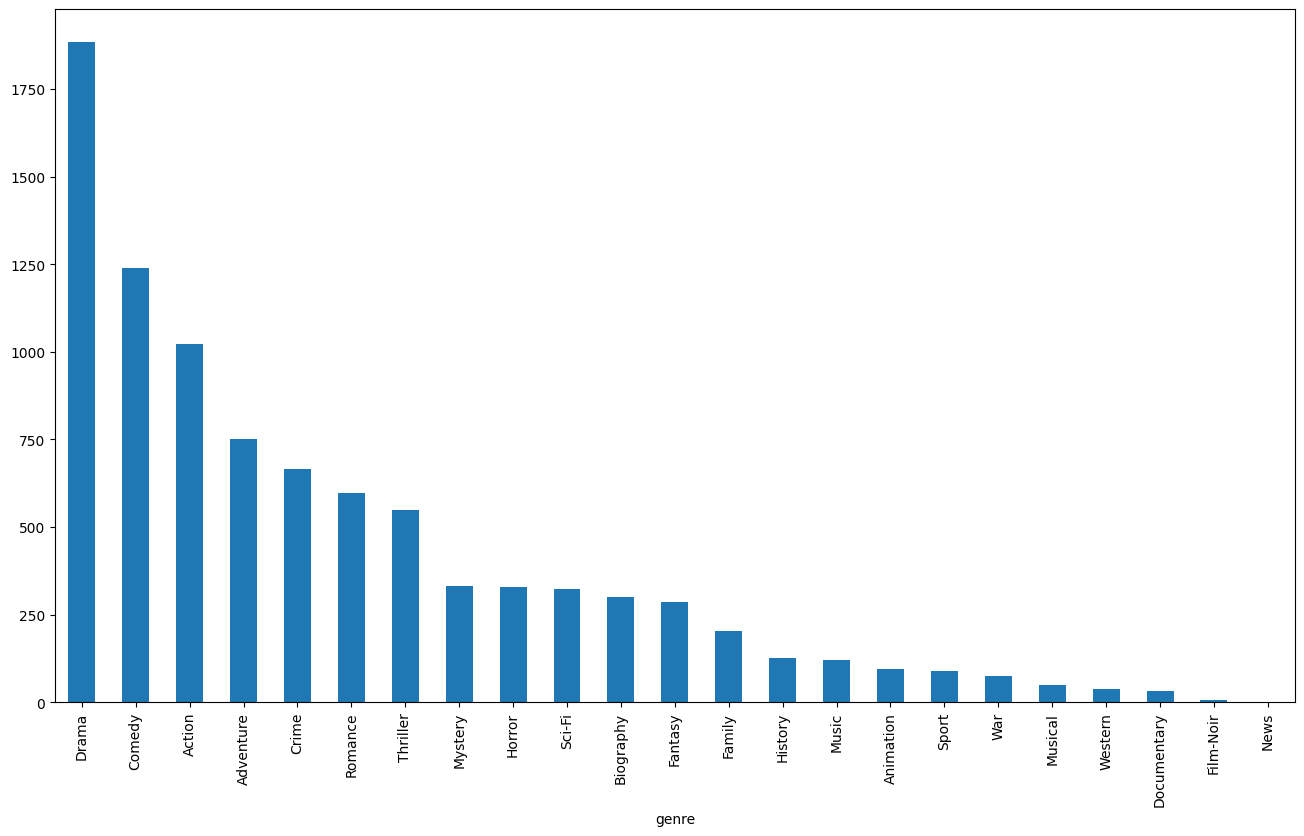

In [71]:
genres_splitted_to_one_column["genre"].value_counts().plot(kind = "bar", figsize= (16,9))

## Transforming data
### Idea:

In [72]:
def _create_binary_features_from_str_feature(row: pd.Series, str_feature_name: str, delimiter: str = ",", skip_values: list = []) -> pd.Series:
    values = row[str_feature_name].split(delimiter)
    for v in values:
        if v in skip_values: continue
        row['is_{0}_{1}'.format(*[str_feature_name,v])] = 1
    return row

def OneHotEncoder_For_Str_Complex_Feature(data_frame: pd.DataFrame, str_feature_name: str, delimiter: str = ",", skip_values: list = [] ) -> pd.DataFrame:
    df = data_frame.apply(lambda row: _create_binary_features_from_str_feature(row, str_feature_name,delimiter,skip_values), axis=1).drop(columns = str_feature_name)
    colnames = df.filter(regex=f"is_{str_feature_name}").columns.values.tolist()
    df[colnames]= df[colnames].fillna(0).astype(np.int64)
    return df

### Actual implementation 
We have put the code into proper transformer class (take a look at custom_preprocessors.py)

In [73]:
#df = pd.read_csv("data/movie_statistic_dataset.csv") #restore data

In [74]:
from custom_preprocessors import OneHotEncoderForMultiStrFeature

oes = OneHotEncoderForMultiStrFeature("genres",skip_values=["\\N","News"])
oes.fit(df)
df_new = oes.transform(df)

In [75]:
df_new.head()

,Domestic gross $,Production budget $,Worldwide gross $,approval_Index,director_age,director_birthYear,director_deathYear,director_name,director_professions,director_years_since_death,...,is_genres_Thriller,is_genres_War,is_genres_Western,movie_averageRating,movie_numerOfVotes,movie_title,production_date,production_month,production_year,runtime_minutes
0,667830256,460000000,2265935552,7.061101,68,1954,alive,James Cameron,"writer,producer,director",0,...,0,0,0,7.8,277543.0,Avatar: The Way of Water,2022-12-09,12,2022,192.0
2,241071802,379000000,1045713802,6.272064,51,1960,alive,Rob Marshall,"director,miscellaneous,producer",0,...,0,0,0,6.6,533763.0,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,137.0
3,459005868,365000000,1395316979,7.214013,51,1964,alive,Joss Whedon,"writer,producer,director",0,...,0,0,0,7.3,870573.0,Avengers: Age of Ultron,2015-04-22,4,2015,141.0
5,229024295,300000000,655945209,5.717212,51,1966,alive,Zack Snyder,"director,producer,writer",0,...,0,0,0,6.1,456977.0,Justice League,2017-11-13,11,2017,120.0
6,200074175,300000000,879077344,6.375644,50,1965,alive,Sam Mendes,"producer,director,miscellaneous",0,...,1,0,0,6.8,445461.0,Spectre,2015-10-06,10,2015,148.0


In [76]:
df_new.loc[df_new["is_genres_Western"]==1,:].shape

(37, 39)

### Apply to director_professions

In [77]:
oes = OneHotEncoderForMultiStrFeature("director_professions")
oes.fit(df_new)
df_new = oes.transform(df_new)

In [78]:
df_new.head()

,Domestic gross $,Production budget $,Worldwide gross $,approval_Index,director_age,director_birthYear,director_deathYear,director_name,director_years_since_death,is_director_professions_actor,...,is_genres_Thriller,is_genres_War,is_genres_Western,movie_averageRating,movie_numerOfVotes,movie_title,production_date,production_month,production_year,runtime_minutes
0,667830256,460000000,2265935552,7.061101,68,1954,alive,James Cameron,0,0,...,0,0,0,7.8,277543.0,Avatar: The Way of Water,2022-12-09,12,2022,192.0
2,241071802,379000000,1045713802,6.272064,51,1960,alive,Rob Marshall,0,0,...,0,0,0,6.6,533763.0,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,137.0
3,459005868,365000000,1395316979,7.214013,51,1964,alive,Joss Whedon,0,0,...,0,0,0,7.3,870573.0,Avengers: Age of Ultron,2015-04-22,4,2015,141.0
5,229024295,300000000,655945209,5.717212,51,1966,alive,Zack Snyder,0,0,...,0,0,0,6.1,456977.0,Justice League,2017-11-13,11,2017,120.0
6,200074175,300000000,879077344,6.375644,50,1965,alive,Sam Mendes,0,0,...,1,0,0,6.8,445461.0,Spectre,2015-10-06,10,2015,148.0


In [79]:
df = df_new

# Production data

In [80]:
#df["production_date"] = pd.to_datetime(df["production_date"])
#df["production_year"], df["production_month"] = df["production_date"].dt.year, df["production_date"].dt.month

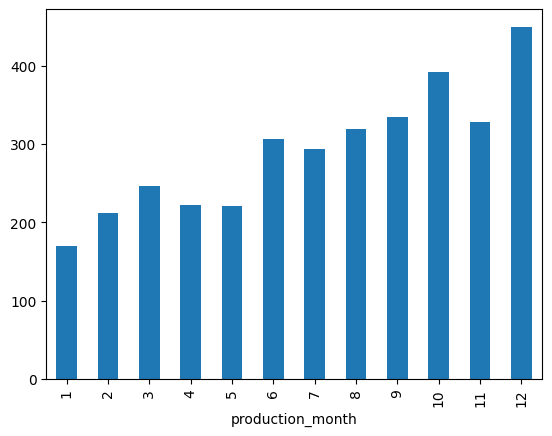

In [81]:
df.production_month.value_counts().sort_index().plot(kind="bar")
plt.show()

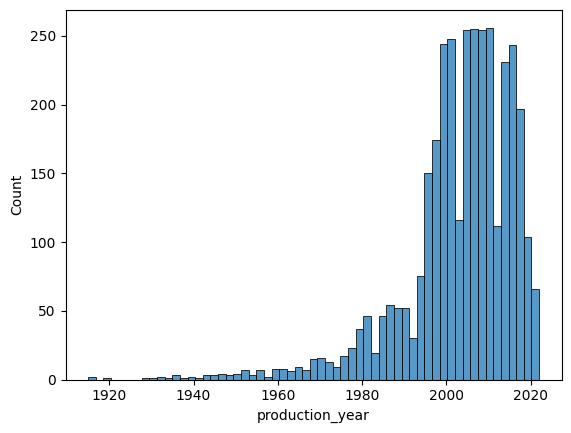

In [82]:
sns.histplot(data = df, x="production_year")
plt.show()

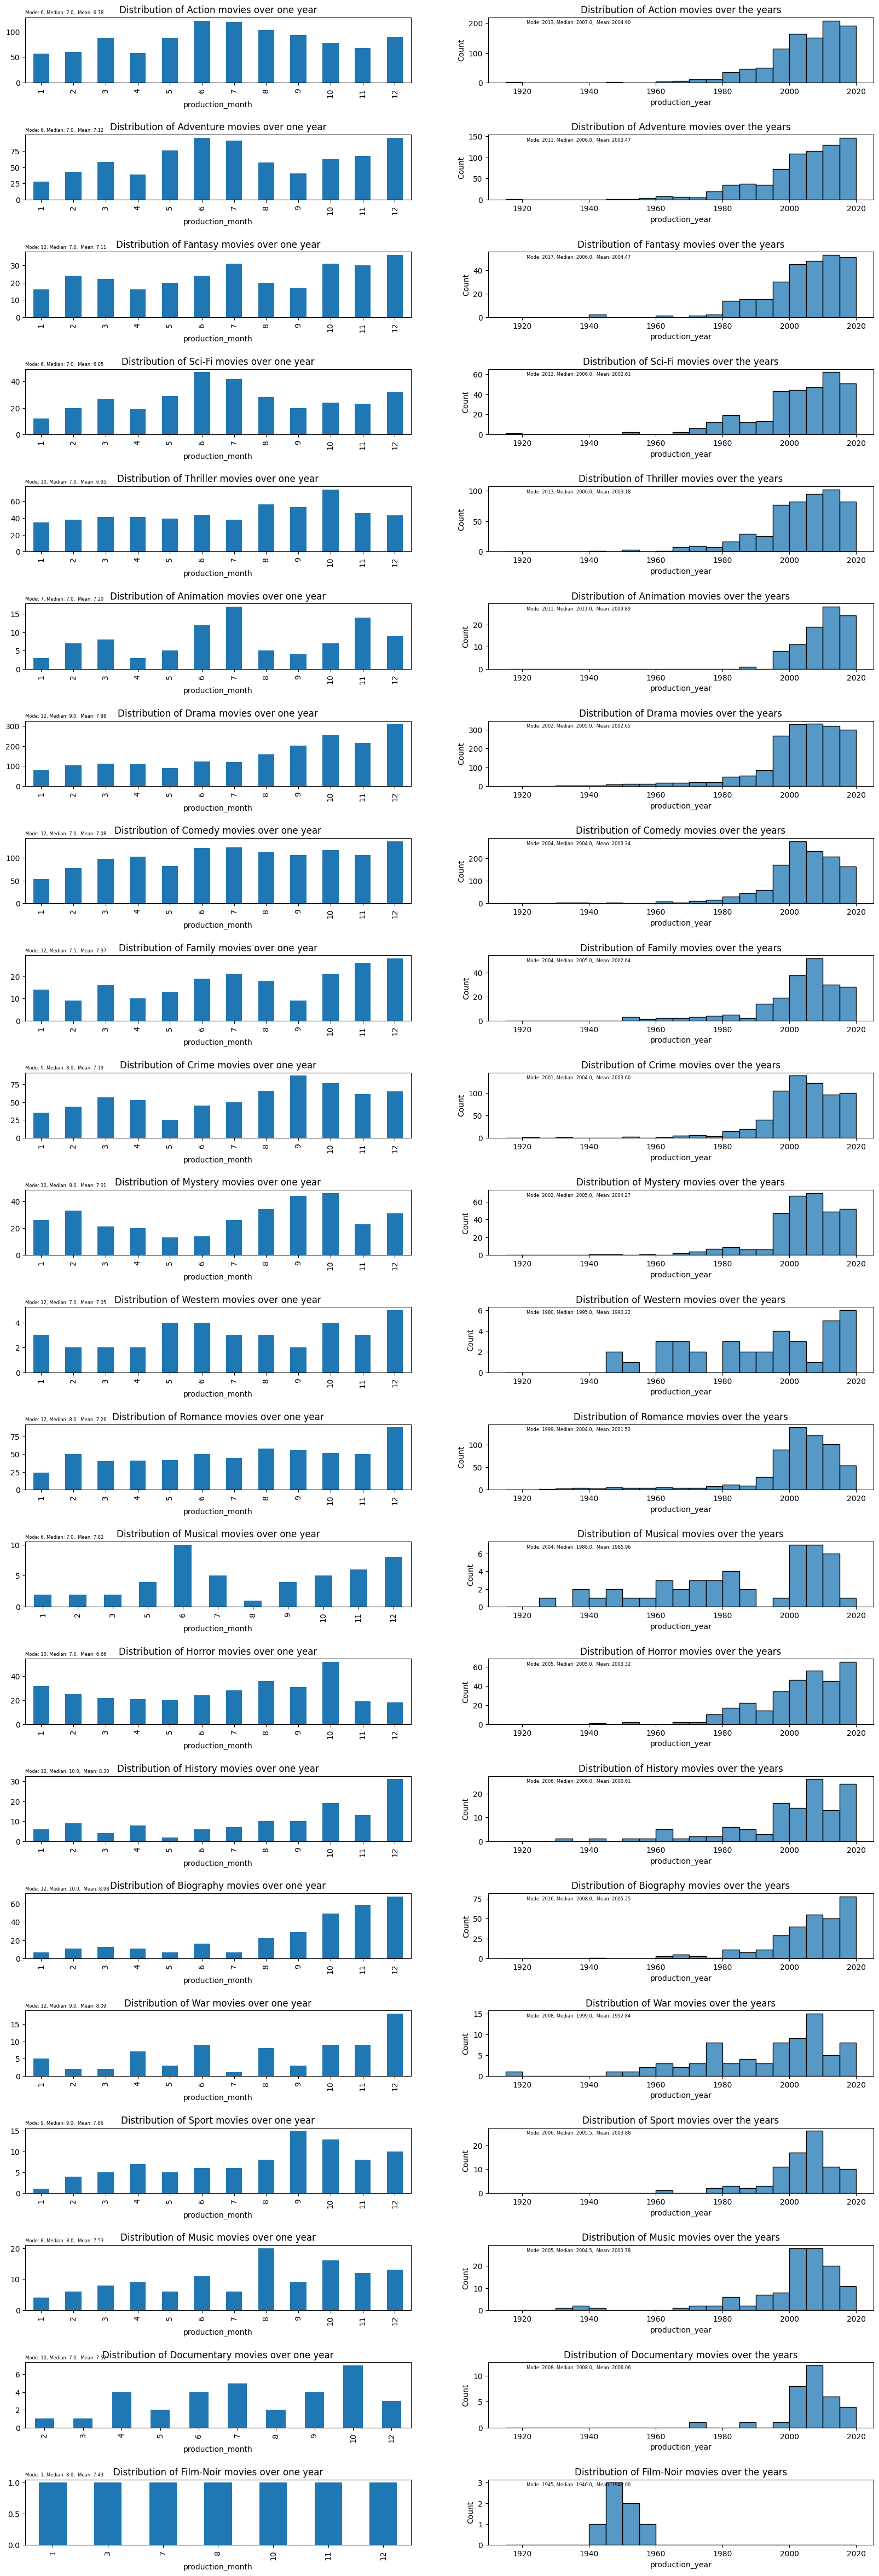

In [114]:
genres = genres_splitted_to_one_column.iloc[:,0].unique().tolist()
genres = [genre for genre in genres if genre not in [None,"News"]]

fig, axs = plt.subplots(len(genres),2, figsize= (20,60))

x_lim = (df.production_year.min(), df.production_year.max())

for i,genre in enumerate(genres):
    col = f'is_genres_{genre}'
    s = df.loc[df[col] == 1,"production_month"]
    s.value_counts().sort_index().plot(kind="bar", ax=axs[i][0])
    axs[i][0].title.set_text( f'Distribution of {genre} movies over one year')
    axs[i][0].text(0.0,1.05,'Mode: {0}, Median: {1},  Mean: {2:.2f}'.format(*[s.mode()[0], s.median(), s.mean()]), fontsize = 6, transform=axs[i][0].transAxes)

    s = df.loc[df[col] == 1,"production_year"]
    sns.histplot(data=df.loc[df[col] == 1,:], x="production_year", ax=axs[i][1], bins=range(x_lim[0], x_lim[1], 5))
    axs[i][1].title.set_text( f'Distribution of {genre} movies over the years')
    axs[i][1].text(0.1,0.9,'Mode: {0}, Median: {1},  Mean: {2:.2f}'.format(*[s.mode()[0], s.median(), s.mean()]), fontsize = 6, transform=axs[i][1].transAxes)

plt.subplots_adjust(hspace=0.8)

plt.show()
    

# Numerical data

# Correlation